Processed 5 December 2021. Data are [here](https://www.covid19.admin.ch/en/vaccination/status?indicator=death&vaccStatusDevRel=inz100).  Documentation is [here](https://www.covid19.admin.ch/api/data/documentation). Code is [here]().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Overall

In [2]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_03_décembre_2021/data', 'COVID19Death_vaccpersons.csv'))
#vote.rename(columns={1: 'Canton', 3:'Commune', 12: 'Oui'}, inplace=True)
#keep = ['Canton', 'Commune', 'Oui']
#vote=vote[keep]
raw.date = pd.to_datetime(raw.date, infer_datetime_format=True)
print(raw.info())
raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3100 non-null   datetime64[ns]
 1   vaccine             3100 non-null   object        
 2   vaccination_status  3100 non-null   object        
 3   entries             3100 non-null   int64         
 4   sumTotal            3100 non-null   int64         
 5   pop                 2778 non-null   float64       
 6   inz_entries         2470 non-null   float64       
 7   inzsumTotal         0 non-null      float64       
 8   mean7d              3040 non-null   float64       
 9   inzmean7d           2422 non-null   float64       
 10  prct                2062 non-null   float64       
 11  prctSumTotal        3100 non-null   float64       
 12  prct_mean7d         1008 non-null   float64       
 13  geoRegion           3100 non-null   object      

,date,vaccine,vaccination_status,entries,sumTotal,pop,inz_entries,inzsumTotal,mean7d,inzmean7d,prct,prctSumTotal,prct_mean7d,geoRegion,type,type_variant,data_completeness,version
0,2021-01-27,moderna,fully_vaccinated,0,0,126.0,0.00,NaN,NaN,NaN,0.0,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-03_07-52-50
1,2021-01-28,moderna,fully_vaccinated,0,0,175.0,0.00,NaN,NaN,NaN,0.0,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-03_07-52-50
2,2021-01-29,moderna,fully_vaccinated,0,0,183.0,0.00,NaN,NaN,NaN,0.0,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-03_07-52-50
3,2021-01-30,moderna,fully_vaccinated,0,0,NaN,NaN,NaN,0.0,NaN,0.0,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-03_07-52-50
4,2021-01-31,moderna,fully_vaccinated,0,0,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-03_07-52-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,2021-12-01,all,unknown,5,754,NaN,NaN,NaN,NaN,NaN,25.0,35.15,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-03_07-52-50
3096,2021-12-02,all,fully_vaccinated,5,317,5741973.0,0.09,NaN,NaN,NaN,50.0,14.71,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-03_07-52-50
3097,2021-12-02,all,partially_vaccinated,0,82,139379.0,0.00,NaN,NaN,NaN,0.0,3.81,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-03_07-52-50
3098,2021-12-02,all,not_vaccinated,4,1001,2828003.0,0.14,NaN,NaN,NaN,40.0,46.45,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-03_07-52-50


In [3]:
deaths = raw.loc[(raw['date'] > '2021-06-30') &
           (raw['vaccine']=='all') &
           (raw['data_completeness']=='intermediate') &
           ((raw['vaccination_status']=='fully_vaccinated') |
           (raw['vaccination_status']=='partially_vaccinated') |
           (raw['vaccination_status']=='not_vaccinated') |
           (raw['vaccination_status']=='unknown'))
           ,
           ('date', 'vaccination_status', 'inzmean7d')]
deaths

,date,vaccination_status,inzmean7d
2480,2021-07-01,fully_vaccinated,0.0
2481,2021-07-01,partially_vaccinated,0.0
2482,2021-07-01,not_vaccinated,0.0
2483,2021-07-01,unknown,NaN
2484,2021-07-02,fully_vaccinated,0.0
...,...,...,...
3095,2021-12-01,unknown,NaN
3096,2021-12-02,fully_vaccinated,NaN
3097,2021-12-02,partially_vaccinated,NaN
3098,2021-12-02,not_vaccinated,NaN


In [4]:
deaths.isna().sum()

date                    0
vaccination_status      0
inzmean7d             164
dtype: int64

In [5]:
deaths.dropna(how='any', inplace=True)
deaths

,date,vaccination_status,inzmean7d
2480,2021-07-01,fully_vaccinated,0.00
2481,2021-07-01,partially_vaccinated,0.00
2482,2021-07-01,not_vaccinated,0.00
2484,2021-07-02,fully_vaccinated,0.00
2485,2021-07-02,partially_vaccinated,0.00
...,...,...,...
3081,2021-11-28,partially_vaccinated,0.10
3082,2021-11-28,not_vaccinated,0.21
3084,2021-11-29,fully_vaccinated,0.10
3085,2021-11-29,partially_vaccinated,0.10


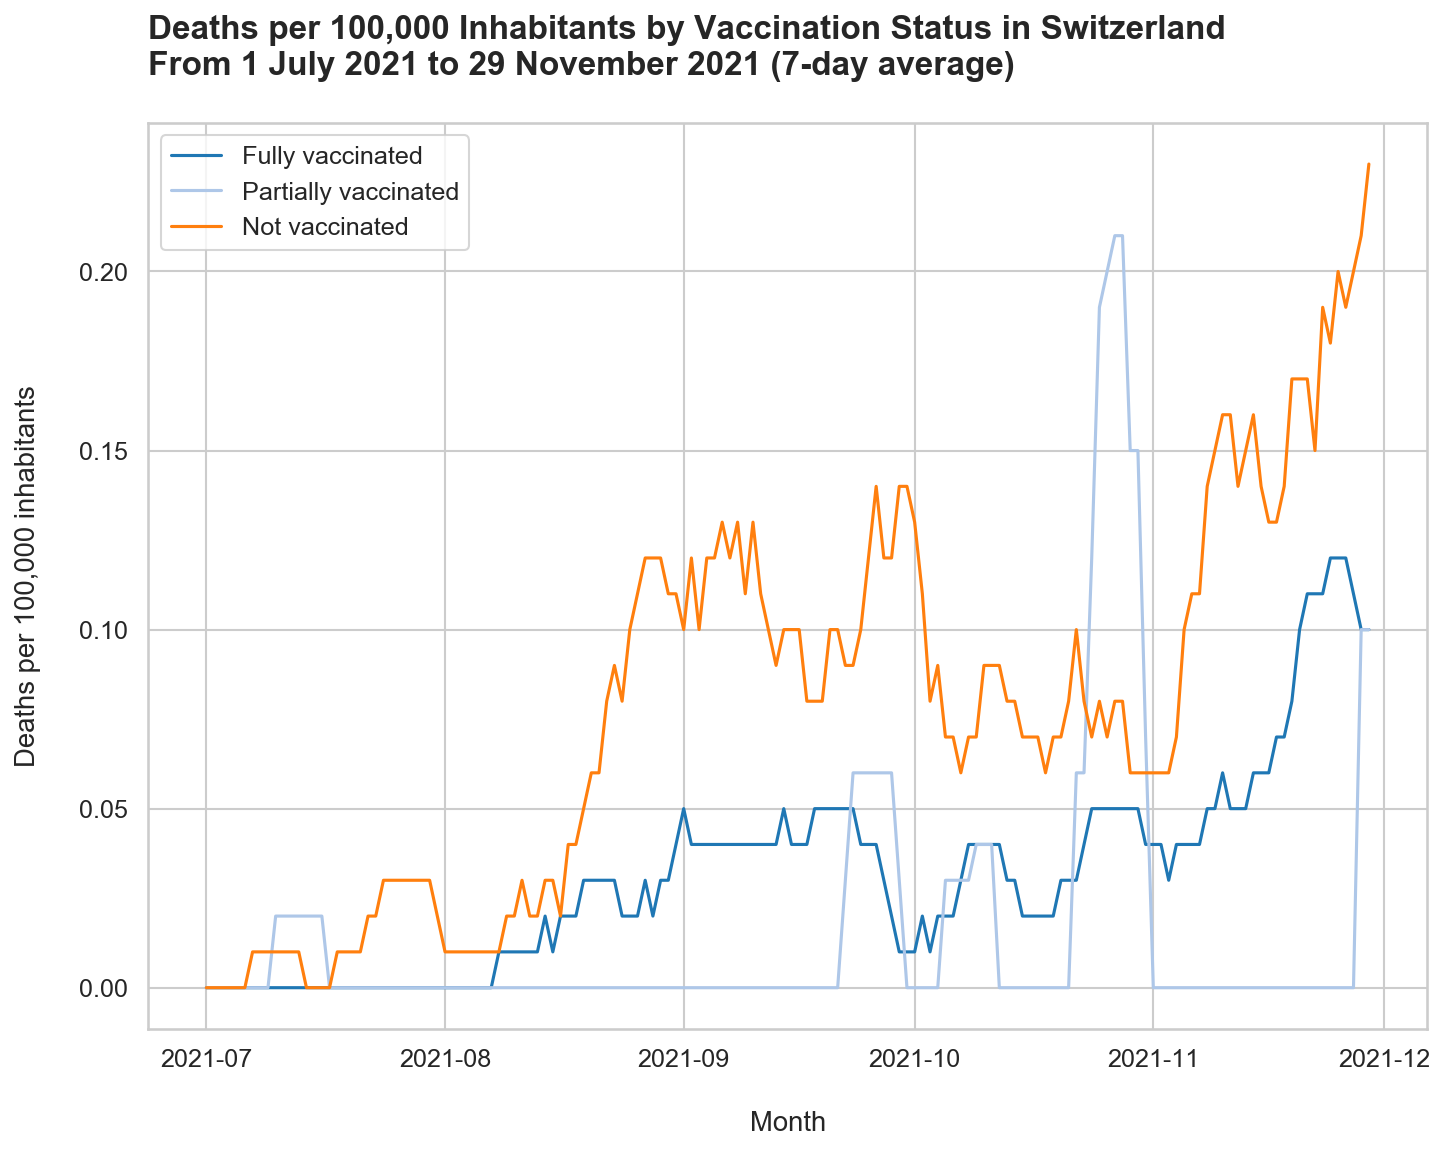

In [152]:
sns.set(rc={"figure.dpi":150, 'figure.figsize':(11,8)}, style='whitegrid', font_scale=1.1)
g=sns.lineplot(data=deaths, x='date', y='inzmean7d', hue='vaccination_status', palette='tab20')
plt.title('Deaths per 100,000 Inhabitants by Vaccination Status in Switzerland\nFrom 1 July 2021 to 29 November 2021 (7-day average)\n', fontweight='bold', loc='left', size=16)
plt.ylabel('Deaths per 100,000 inhabitants\n')
plt.xlabel('\nMonth')
g.legend_.set_title(None)
g.legend(labels=['Fully vaccinated', 'Partially vaccinated', 'Not vaccinated'])
plt.show()

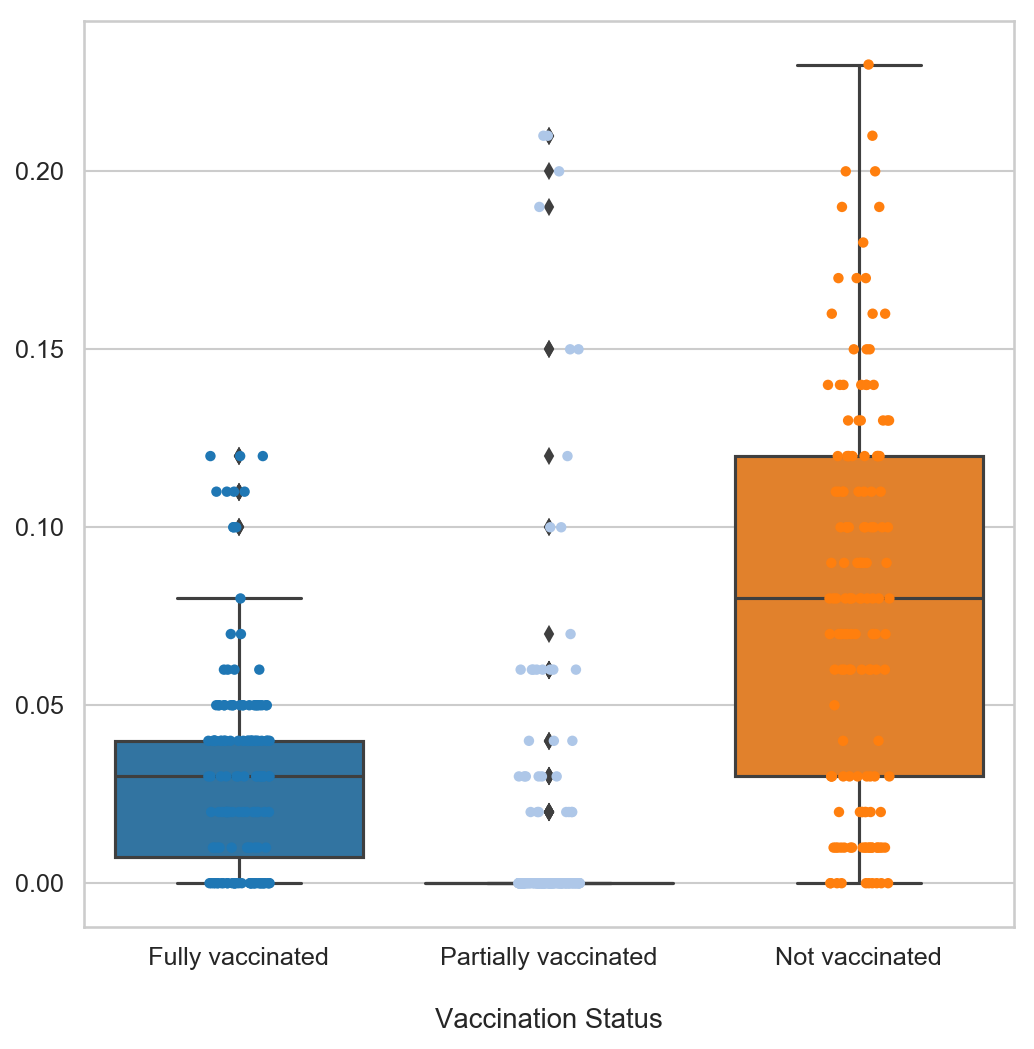

In [151]:
sns.set(rc={"figure.dpi":150, 'figure.figsize':(8,8)}, style='whitegrid', palette='tab20', font_scale=1.1)
g=sns.boxplot(data=deaths, y='inzmean7d', x='vaccination_status')
sns.stripplot(data=deaths, y='inzmean7d', x='vaccination_status')
plt.ylabel('')
plt.xlabel('\nVaccination Status')
g.set_xticklabels(['Fully vaccinated', 'Partially vaccinated', 'Not vaccinated'])
plt.show()